# 1

Para a construção de um modelo de machine learning são necessários dados. Como tarefa inicial, faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y). A variável alvo é a coluna que quer classificar, contendo a informação se o paciente possui ou não a diabetes. As variáveis explicativas são todas as colunas com exceção da diabetes. A separação dos dados pode ser feita com a seleção de colunas com pandas.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('diabetes.csv')
data

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [3]:
x = data.drop(columns='diabetes')
y = data['diabetes']
x

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc
0,66,23,94,28.1,0.167
1,40,35,168,43.1,2.288
2,50,32,88,31.0,0.248
3,70,45,543,30.5,0.158
4,60,23,846,30.1,0.398
...,...,...,...,...,...
389,88,44,510,43.3,0.222
390,88,39,110,36.5,1.057
391,58,26,16,28.4,0.766
392,76,48,180,32.9,0.171


In [4]:
y

0      0
1      1
2      1
3      1
4      1
      ..
389    1
390    1
391    0
392    0
393    0
Name: diabetes, Length: 394, dtype: int64

# 2

Uma etapa muito importante em projetos de classificação é a validação dos modelos, para identificar se está havendo a generalização do modelo para dados novos. Realize a divisão dos dados entre treino, validação e teste. Utilize 5% dos dados para teste e com o restante, deixe 25% para validação. No momento da separação, use o parâmetro stratify a partir da variável alvo para manter a proporção dos dados.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_split, x_test, y_split, y_test = train_test_split(x, y, test_size=0.05, stratify=y, random_state=42)

In [7]:
x_train, x_valid, y_train, y_valid = train_test_split(x_split, y_split, test_size=0.25, stratify=y_split, random_state=42)

# 3

A etapa de modelagem de dados consiste em utilizar um algoritmo capaz de identificar padrões nos dados e classificar os valores. A partir do modelo é possível extrair uma taxa de acerto para entender o seu desempenho. Crie 2 modelos utilizando os algoritmos DecisionTreeClassifier e RandomForestClassifer e avalie a acurácia de treino e teste, escolhendo o valor 3 para o parâmetro max_depth do algoritmo DecisionTreeClassifier e valor 2 para o max_depth do algoritmo RandomForestClassifier, para os modelos não se especializarem demais no padrão dos dados de treino.

In [8]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(max_depth=3)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2)

In [9]:
def experiment_model(model):
    
    model.fit(x_train, y_train)
    print(f'Acurácia de treino: {model.score(x_train, y_train):.2f}')
    print(f'Acurácia de teste: {model.score(x_valid, y_valid):.2f}')

In [10]:
experiment_model(dtc_model)

Acurácia de treino: 0.81
Acurácia de teste: 0.67


In [11]:
experiment_model(rfc)

Acurácia de treino: 0.77
Acurácia de teste: 0.64


# 4

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

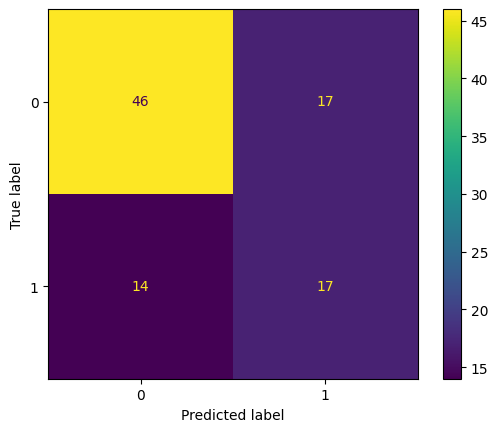

In [13]:
y_predict_dtc = dtc_model.predict(x_valid)
ConfusionMatrixDisplay.from_predictions(y_valid, y_predict_dtc)

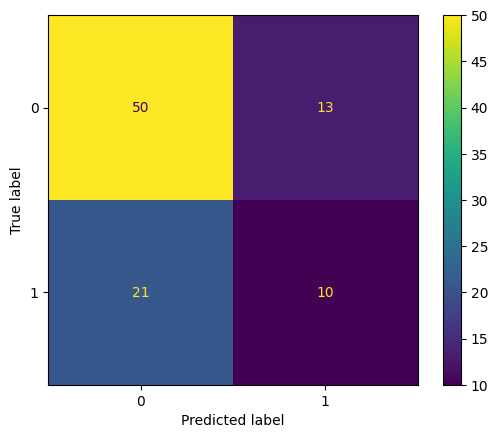

In [14]:
y_predict_rfc = rfc.predict(x_valid)
ConfusionMatrixDisplay.from_predictions(y_valid, y_predict_rfc)

# 1

In [15]:
from sklearn.metrics import classification_report
print("Decision Tree\n", classification_report(y_valid, y_predict_dtc))
print("Random Forest\n", classification_report(y_valid, y_predict_rfc))

Decision Tree
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        63
           1       0.50      0.55      0.52        31

    accuracy                           0.67        94
   macro avg       0.63      0.64      0.64        94
weighted avg       0.68      0.67      0.67        94

Random Forest
               precision    recall  f1-score   support

           0       0.70      0.79      0.75        63
           1       0.43      0.32      0.37        31

    accuracy                           0.64        94
   macro avg       0.57      0.56      0.56        94
weighted avg       0.62      0.64      0.62        94



# 2

In [16]:
from sklearn.metrics import RocCurveDisplay

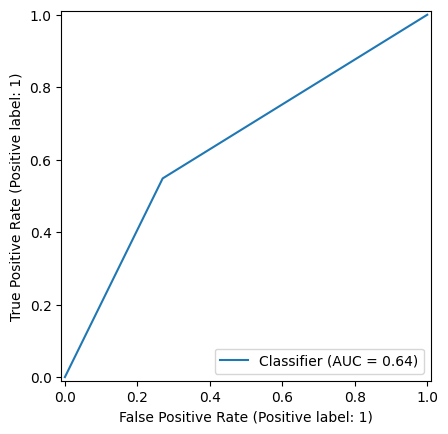

In [17]:
RocCurveDisplay.from_predictions(y_valid, y_predict_dtc)

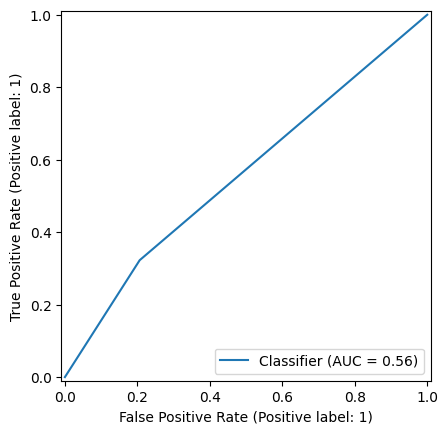

In [18]:
RocCurveDisplay.from_predictions(y_valid, y_predict_rfc)

In [19]:
from sklearn.metrics import roc_auc_score

In [20]:
roc_auc_score(y_valid, y_predict_dtc)

np.float64(0.6392729134664619)

In [21]:
roc_auc_score(y_valid, y_predict_rfc)

np.float64(0.558115719406042)

In [22]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

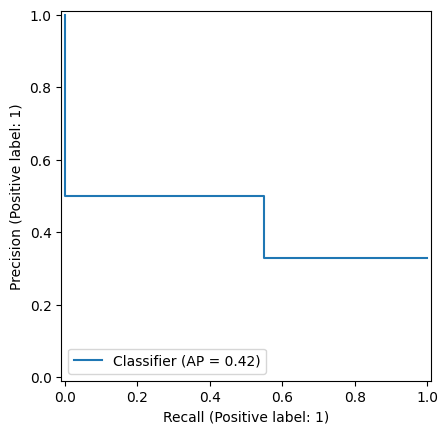

In [23]:
PrecisionRecallDisplay.from_predictions(y_valid, y_predict_dtc)

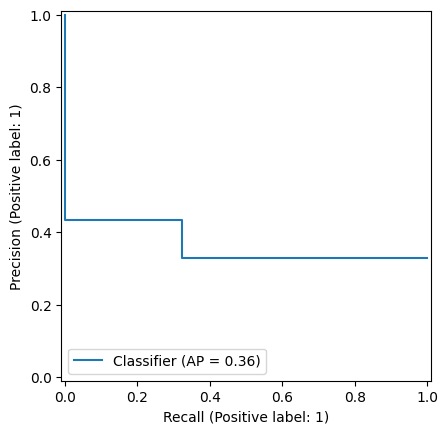

In [24]:
PrecisionRecallDisplay.from_predictions(y_valid, y_predict_rfc)

In [25]:
average_precision_score(y_valid, y_predict_dtc)

np.float64(0.4231297185998627)

In [26]:
average_precision_score(y_valid, y_predict_rfc)

np.float64(0.3636567097371013)

# Novo desafio

## 1

In [27]:
def intervalo_confianca(resultados, nome_modelo):
    media = resultados.mean()
    desvio_padrao = resultados.std()
    print(f'Intervalo de confiança ({nome_modelo}): [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

## 2

In [40]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut

In [29]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [32]:
resultado_arvore = cross_val_score(dtc_model, x_split, y_split, cv=kf)
resultado_random = cross_val_score(rfc, x_split, y_split, cv=kf)

In [33]:
intervalo_confianca(resultado_arvore, 'Decision Tree')
intervalo_confianca(resultado_random, 'Random Forest')

Intervalo de confiança (Decision Tree): [0.5789790417775227, 0.8544491232295897]
Intervalo de confiança (Random Forest): [0.5453463224972771, 0.8391486988398494]


## 3

In [35]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [37]:
resultado_arvore = cross_val_score(dtc_model, x_split, y_split, cv=skf)
resultado_random = cross_val_score(rfc, x_split, y_split, cv=skf)

In [38]:
intervalo_confianca(resultado_arvore, 'Decision Tree')
intervalo_confianca(resultado_random, 'Random Forest')

Intervalo de confiança (Decision Tree): [0.5709980992909459, 0.8344073061144596]
Intervalo de confiança (Random Forest): [0.6361916596247025, 0.7537087671178299]


## 4

In [41]:
loo = LeaveOneOut()

In [42]:
resultado_arvore = cross_val_score(dtc_model, x_split, y_split, cv=loo)
resultado_random = cross_val_score(rfc, x_split, y_split, cv=loo)

In [43]:
intervalo_confianca(resultado_arvore, 'Decision Tree')
intervalo_confianca(resultado_random, 'Random Forest')

Intervalo de confiança (Decision Tree): [-0.20029880549115986, 1]
Intervalo de confiança (Random Forest): [-0.240129156146637, 1]


# Novo desafio

## 1

In [51]:
proporcao_variavel_alvo = data['diabetes'].value_counts()
proporcao_variavel_alvo

diabetes
0    264
1    130
Name: count, dtype: int64

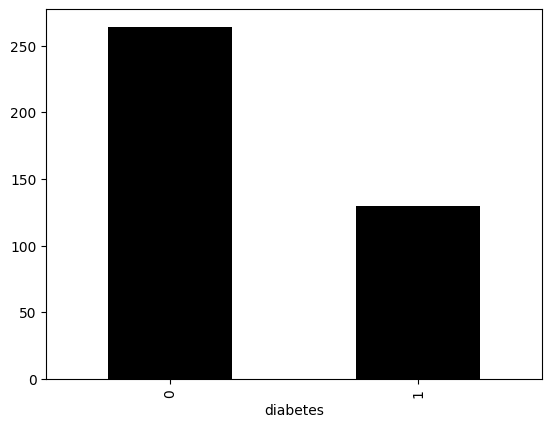

In [52]:
proporcao_variavel_alvo.plot(kind='bar', color='black');

## 2

In [66]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

### Arvore

In [67]:
pipeline_SMOTE = imbpipeline(
    [
        ('oversample', SMOTE()),
        ('arvore', dtc_model)
    ]
)

In [68]:
cv_resultados_oversampling = cross_val_score(pipeline_SMOTE, x_split, y_split, cv=skf, scoring='f1')

In [70]:
cv_resultados_oversampling.mean()

np.float64(0.5690750324943873)

### Random

In [71]:
pipeline_SMOTE = imbpipeline(
    [
        ('oversample', SMOTE()),
        ('arvore', rfc)
    ]
)

cv_resultados_oversampling = cross_val_score(pipeline_SMOTE, x_split, y_split, cv=skf, scoring='f1')

cv_resultados_oversampling.mean()

np.float64(0.6198292765382015)

## 3

In [72]:
from imblearn.under_sampling import NearMiss

In [73]:
pipeline_SMOTE = imbpipeline(
    [
        ('undersample', NearMiss(version=3)),
        ('arvore', dtc_model)
    ]
)

cv_resultados_oversampling = cross_val_score(pipeline_SMOTE, x_split, y_split, cv=skf, scoring='f1')

cv_resultados_oversampling.mean()

np.float64(0.5397144564972416)

In [74]:
pipeline_SMOTE = imbpipeline(
    [
        ('undersample', NearMiss(version=3)),
        ('random', rfc)
    ]
)

cv_resultados_oversampling = cross_val_score(pipeline_SMOTE, x_split, y_split, cv=skf, scoring='f1')

cv_resultados_oversampling.mean()

np.float64(0.6038621351766513)

## 4

In [75]:
oversample = SMOTE()

In [76]:
x_balanceado, y_balanceado = oversample.fit_resample(x_split, y_split)

In [77]:
dtc_model.fit(x_balanceado, y_balanceado)
y_previsto = dtc_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.64      0.54      0.58        13
           1       0.33      0.43      0.38         7

    accuracy                           0.50        20
   macro avg       0.48      0.48      0.48        20
weighted avg       0.53      0.50      0.51        20



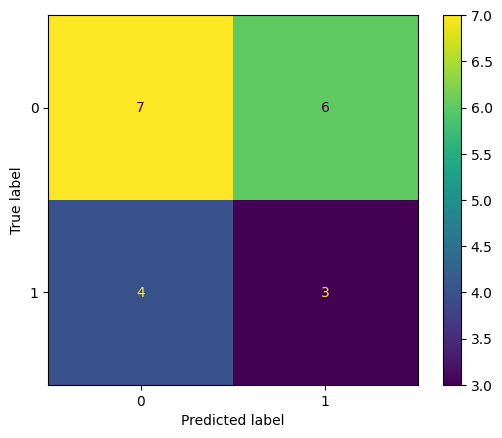

In [78]:
print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto)